In [217]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

# Outline
1. Reading the Data
2. Missing Values
3. EDA
4. Feature Engineering
5. Model Building and Evaluation
6. Stacking

### 1. Reading the Data

In [218]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv', encoding= 'unicode_escape')

train_b = train.copy()

In [219]:
print('Shape of Training Data : ',train.shape)
train.head(5)

Shape of Training Data :  (30363, 17)


,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,overall,score_1,score_2,score_3,score_4,score_5,score_6
0,1,startup_1,NaN,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,NaN,5.0,4.0,5.0,5.0,4.0,5.0,0
1,5,startup_1,"Los Angeles, CA","Jul 19, 2018",Former Employee,Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49
2,9,startup_1,"New York, NY","Dec 10, 2018",Current Employee,Anonymous Employee,Google Surpasses Realistic Expectations,Great products. Vision you can feel good about...,Younger employees complaining about the compan...,NaN,5.0,5.0,5.0,5.0,5.0,5.0,0
3,16,startup_1,NaN,"Dec 6, 2018",Current Employee,Anonymous Employee,Review,The people are great to work with,There is lower compensation than expected,NaN,5.0,NaN,NaN,NaN,NaN,NaN,0
4,17,startup_1,NaN,"Nov 29, 2018",Current Employee,Anonymous Employee,Review of Google,"The people are great to work with, good perks.",Wide variety in experience based on team.,NaN,5.0,4.0,5.0,5.0,5.0,4.0,2


### Metadata
1. "ID" - Identification Number
2. "Place" - Startups (1 to 6)
3. "location" - Location of Startup
4. "Date" - Date of review
5. "Status" - Current status of reviewer with the startup
6. "job_titl" - Position of work at athe startup
7. "summary" - Overall summary
8. "positives" - pros
9. "negatives" - Cons
10. "advice_to_mgmt" - Comments given by the reviewer to the management
11. "overall" - Overall rating provided by the reviewer
12. "score_1" to "score_5" - Intricate rating which reflects the condition of work at the startup (1-5)
13. 'score_6' - Number of likes received by the reviewer of the review

### 2. Missing values

11231  or  0.3699  % Missing values in  location
63    or  0.0021 % Missing values in  summary
1    or  0.0 % Missing values in  negatives
13209  or  0.435  % Missing values in  advice_to_mgmt
3190  or  0.1051  % Missing values in  score_1
6053  or  0.1994  % Missing values in  score_2
3165  or  0.1042  % Missing values in  score_3
3199  or  0.1054  % Missing values in  score_4
3460  or  0.114  % Missing values in  score_5


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 <a list of 17 Text xticklabel objects>)

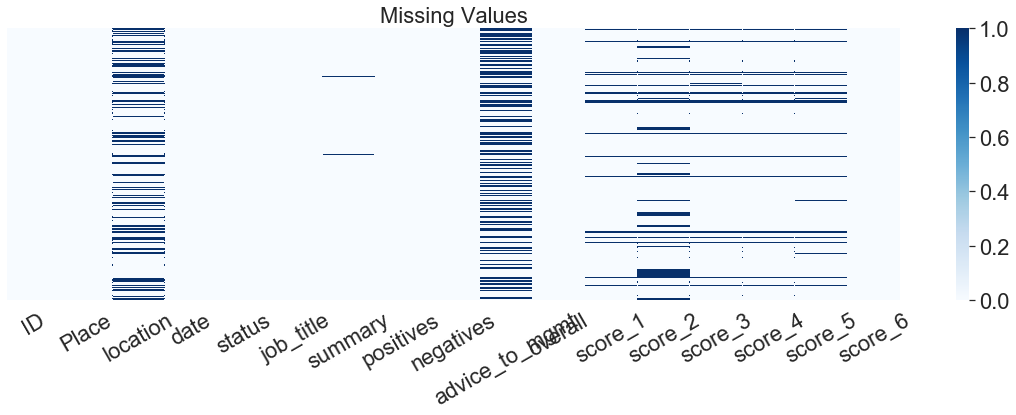

In [220]:
# Check for missing values
count = 0
for i in train.columns:
    if train.isnull().sum()[i] > 0:
        if train.isnull().sum()[i] < 1000:
            print(train.isnull().sum()[count],'   or ',round((train.isnull().sum()[i])/(train.shape[0]),4),'%','Missing values in ',train.columns[count])
        else:
            print(train.isnull().sum()[count],' or ',round((train.isnull().sum()[i])/(train.shape[0]),4),' %','Missing values in ',train.columns[count])
        
    count += 1
        
fig, ax = plt.subplots(figsize=(20,5))
sns.set(font_scale=2)
plt.title('Missing Values', fontsize=22)
sns.heatmap(train.isnull(), cmap="Blues", yticklabels=False, ax=ax)
plt.xticks(rotation = 30)

In [221]:
# Distribution of numerical columns
train.describe()

,ID,overall,score_1,score_2,score_3,score_4,score_5,score_6
count,30363.000000,30363.000000,27173.000000,24310.000000,27198.000000,27164.000000,26903.000000,30363.000000
mean,33779.227382,3.824754,3.372263,3.776800,3.631609,3.936994,3.322269,1.087607
std,19491.487518,1.155155,1.301732,1.296621,1.228599,1.047924,1.312911,4.920717
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16889.500000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,33889.000000,4.000000,3.500000,4.000000,4.000000,4.000000,3.000000,0.000000
75%,50628.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,1.000000
max,67529.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,449.000000


### 3. EDA

1. Ex-emplyees may rate low compared to present employees. Verify!
2. What are the most common word used by reviewer while writing summary, positives, negatives, advice_to_mgmt.

(array([-1000.,     0.,  1000.,  2000.,  3000.]),
 <a list of 5 Text yticklabel objects>)

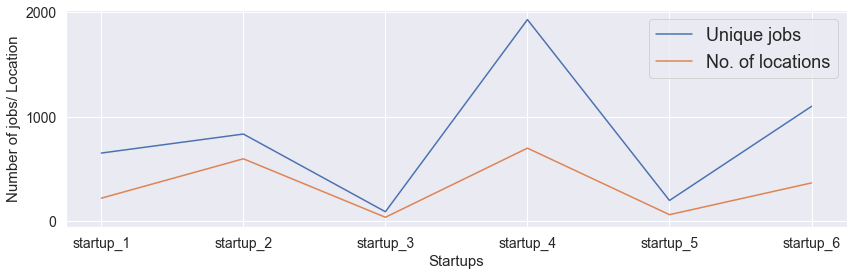

In [222]:
plt_df = pd.DataFrame({'place':train.groupby('Place')['job_title'].nunique().index,
                      'jobs':train.groupby('Place')['job_title'].nunique().values,
                      'locations':train.groupby('Place')['location'].nunique().values})
plt.figure(figsize=(14,4))
plt.plot(plt_df.place,plt_df.jobs,label='Unique jobs')
plt.plot(plt_df.place,plt_df.locations,label='No. of locations')
plt.xlabel('Startups',fontsize = 15)
plt.ylabel('Number of jobs/ Location',fontsize = 15)
plt.legend(fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

Text(0.5, 1.0, 'Overall vs Score_1 to score_6')

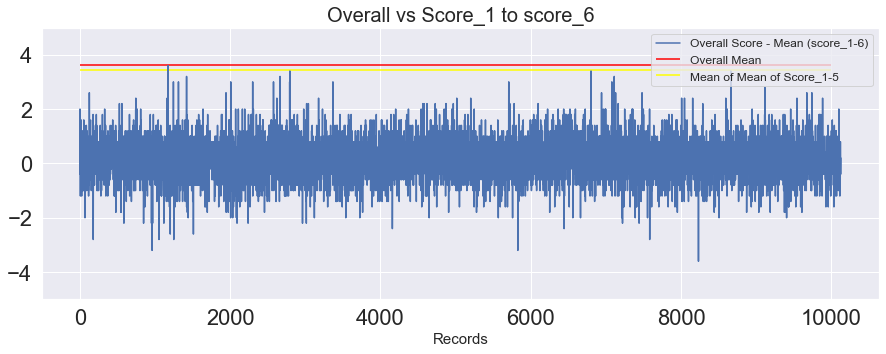

In [223]:
# Relation between overall & scores_1-scores_5
plt_df2 = train.dropna().copy()
plt_df2['mean_score'] = (plt_df2['score_1']+plt_df2['score_2']+plt_df2['score_3']+plt_df2['score_4']+plt_df2['score_5'])/5
plt.figure(figsize = (15,5))
plt.plot(plt_df2.reset_index().index,(plt_df2.overall-plt_df2.mean_score),label='Overall Score - Mean (score_1-6)')
plt.ylim(-5,5)
plt.hlines(plt_df2.overall.mean(),0,10000,label = 'Overall Mean',color='red')
plt.hlines(plt_df2.mean_score.mean(),0,10000,label = 'Mean of Mean of Score_1-5',color='yellow')
plt.legend(fontsize=12)
plt.xlabel('Records',fontsize = 15)
plt.title('Overall vs Score_1 to score_6', fontsize = 20)

In [224]:
# Overall rating distribution by employee status
train.groupby('status')['overall'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True,figsize = (16,6))
plt.xticks(rotation = 0)
plt.ylabel('% of Rating',fontsize=12)
plt.title('rating distribution by employee's job status',fontsize=15)
plt.xlabel('Status',fontsize=12)

SyntaxError: invalid syntax (<ipython-input-224-81f1c9e3323b>, line 5)

In [ ]:
# Extract text from summary, positives, negatives, advice_to_mgmt to plot wordcloud 
stopwords = set(STOPWORDS) 
def get_text(df):
    all_words = ''
    for val in df:
        val = str(val) 

        # split the text 
        tokens = val.split() 

        # Converts to lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        all_words += " ".join(tokens)+" "
    return all_words
  
text_summary = get_text(train.summary)
text_positives = get_text(train.positives)
text_negatives = get_text(train.negatives)
text_advice = get_text(train.advice_to_mgmt.dropna())

In [ ]:
# Most common words in Summary
wordcloud = WordCloud(width = 1800, height = 600, collocations=False, background_color ='white', 
                stopwords = stopwords, min_font_size = 10).generate(text_summary) 
  
# plot the WordCloud image                    
plt.figure(figsize = (14, 6), facecolor = None) 
plt.imshow(wordcloud)
plt.title('Most commom words in summary')
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
# Most common words in Summary
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,6))

wordcloud_positives = WordCloud(width = 850, height = 600, collocations=False, background_color ='white', 
                stopwords = stopwords, min_font_size = 10).generate(text_positives) 
wordcloud_negatives= WordCloud(width = 850, height = 600, collocations=False, background_color ='white', 
                stopwords = stopwords, min_font_size = 10).generate(text_negatives)
  
# plot the WordCloud image         
ax1.imshow(wordcloud_positives) 
ax2.imshow(wordcloud_negatives)
ax1.set_title('Positive reviwes')
ax2.set_title('Negative reviwes')
ax1.axis("off")
ax2.axis("off")
plt.show()

In [ ]:
# Most common words in advice_to_mgmt
wordcloud = WordCloud(width = 1800, height = 600, collocations=False, background_color ='white', 
                stopwords = stopwords, min_font_size = 10).generate(text_advice) 
  
# plot the WordCloud image                    
plt.figure(figsize = (14, 6), facecolor = None)
plt.imshow(wordcloud)
plt.title('Most commom words in summary')
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# Overall rating distribution by employee status
train.groupby('Place')['overall'].value_counts(normalize=True).mul(100).unstack().plot.bar(stacked=True,figsize = (16,6))
plt.xticks(rotation = 0)
plt.ylabel('% of Rating',fontsize=12)
plt.title('rating distribution by Startups',fontsize=15)
plt.xlabel('Startups',fontsize=12)

## Key-Takeaways from EDA
1. startup_5 has the best overall rating compared to other startups, whereas startup_4 has most number of unique job roles and locations.
2. The Mean of Score_1 to score_5 is close to overall score & in majority cases, they are within 1 start range from each other.
3. Our assumption was right, Ex-employees tend to rate lower as compared to current employees.
4. Most of the negatives feedback & advice to management reviews contain words like time, work, pay, management which gives us a lot of idea about where the problem lies.

## Feature Engineering

In [ ]:
# Location - missing values imputation
train2 = train.copy()

def treat_location(df):
    df.location = df.location.fillna('NA(NA')
    
    # Separate Country from location
    df['country'] = np.nan
    df.country = df.location.apply(lambda x : x.split('(')[1].strip().split(')')[0] if len(x.split('(')) > 1 else ('usa' if  '(' not in x else 'NA'))
    
    df.location = df.location.apply(lambda x : x.split('(')[0].strip() if ('(') in x else x)
    return df

train = treat_location(train)
test = treat_location(test)

In [ ]:
# extract and encode countries

# all countries present in training and testing data
all_countries = []
for i in range(train.shape[0]):
    if train.country[i] not in all_countries:
        all_countries.append(train.country[i])
        
for i in range(test.shape[0]):
    if test.country[i] not in all_countries:
        all_countries.append(test.country[i])
        
le_countries = LabelEncoder().fit(all_countries)
train.country = le_countries.transform(train.country)
test.country = le_countries.transform(test.country)

In [ ]:
# extract and encode locations

# all City/Town present in training and testing data
all_locations = []
for i in range(train.shape[0]):
    if train.location[i] not in all_locations:
        all_locations.append(train.location[i])
        
for i in range(test.shape[0]):
    if test.location[i] not in all_locations:
        all_locations.append(test.location[i])
        
le_locations = LabelEncoder().fit(all_locations)
train.location = le_locations.transform(train.location)
test.location = le_locations.transform(test.location)

In [ ]:
# Encode Place (Startup's)
le_place = LabelEncoder().fit(train.Place.unique())
train.Place = le_place.transform(train.Place)
test.Place = le_place.transform(test.Place)

In [ ]:
# encode status (Current/Former employee)
train.status = train.status.apply(lambda x : 1 if x == 'Current Employee ' else 0)
test.status = test.status.apply(lambda x : 1 if x == 'Current Employee ' else 0)

In [ ]:
# encode job titles
all_job_title = []
for i in range(train.shape[0]):
    if train.job_title[i] not in all_job_title:
        all_job_title.append(train.job_title[i])
        
for i in range(test.shape[0]):
    if test.job_title[i] not in all_job_title:
        all_job_title.append(test.job_title[i])
        
le_job_title = LabelEncoder().fit(all_job_title)
train.job_title = le_job_title.transform(train.job_title)
test.job_title = le_job_title.transform(test.job_title)

In [ ]:
# Extract year, month, day from Date
train['year'] = train['date'].apply(lambda x : int(x.split(' ')[3]))
train['month'] = train['date'].apply(lambda x : (x.split(' ')[1]))
train['day'] = train['date'].apply(lambda x : int(x.split(' ')[2].split(',')[0]))

# remove invalid values (0)
train['day'] = train['day'].apply(lambda x : int(train.day.mean()) if x == 0 else x)
train['year'] = train['year'].apply(lambda x : int(train.year.mean()) if x == 0 else x)

train.drop('date', axis=1, inplace = True)


test['date'] = test['date'].apply(lambda x : ' Dec 10, 2018' if x == 'None' else x)
test['year'] = test['date'].apply(lambda x : int(x.split(' ')[3]))
test['month'] = test['date'].apply(lambda x : (x.split(' ')[1]))
test['day'] = test['date'].apply(lambda x : int(x.split(' ')[2].split(',')[0]))

# remove invalid values (0)
test['day'] = test['day'].apply(lambda x : int(test.day.mean()) if x == 0 else x)
test['year'] = test['year'].apply(lambda x : int(test.year.mean()) if x == 0 else x)
train['month'] = pd.to_datetime(train['month'], format = '%b').dt.month

test.drop('date', axis=1, inplace = True)

In [ ]:
# Impute missing values in scores (1-5) using 'overall', because of high correlation between them
cols = ['score_1','score_2','score_3','score_4','score_5']
for i in range(len(cols)):
    for j in range(train.shape[0]):
        if math.isnan(train[cols[i]][j]):
            train[cols[i]][j] = train.overall[j]

In [ ]:
# Fill missing values in summary and negatives column
def fill_na(df):
    df.summary.fillna('not available', inplace = True)
    df.negatives.fillna('not available', inplace = True)
    return df
train = fill_na(train)
test = fill_na(test)

In [ ]:
# Remove 'advice_to_mgmt' because of too many missing values
train.drop('advice_to_mgmt',axis=1,inplace = True)
test.drop('advice_to_mgmt',axis=1,inplace = True)

### Convert text columns into vectors

In [ ]:
from gensim.models import Word2Vec
import re

from nltk.corpus import stopwords
import nltk
from string import punctuation

In [39]:
# vectorize summary, positives and negatives column using word2vec
def get_vectors(df):
    cols = ['summary','positives','negatives']
    for c in cols:
        # define stopwords
        custom_set_of_stopwords = set(stopwords.words('english')+list(punctuation))
        clean_txt = []
        for w in range(len(df[c])):
            desc = df[c][w].lower()

            #remove punctuation
            desc = re.sub('[^a-zA-Z]', ' ', desc)

            #remove tags
            desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)

            #remove special chars, digits
            desc=re.sub("(\\d|\\W)+"," ",desc)
            clean_txt.append(desc)
        df['cleaned'] = clean_txt

        # prepare word corpus
        corpus = []
        for col in df.cleaned:
            word_list = col.split(" ")
            corpus.append(word_list)

        for i in range(len(corpus)):
            corpus[i] = [x for x in corpus[i] if x not in custom_set_of_stopwords]

        #generate vectors
        model = Word2Vec(corpus, min_count=1, size = 30)

        # get vectors for each word in a field and average them
        embeds = []
        for i in range(df.shape[0]):
            divider = 0
            summer = np.zeros(30)
            tester = np.zeros(30)
            for j in range(len(df.iloc[i,-1].split(' '))):
                w_f = df.iloc[i,-1].split(' ')[j]
                if (len(w_f) > 2) & (w_f not in custom_set_of_stopwords):   
                    divider +=1
                    summer = np.add(model[df.iloc[i,-1].split(' ')[j]],summer)
            all_zero_flag = 0 
            for i in range(len(summer)):
                if summer[i] == 0:
                    all_zero_flag += 1

            if all_zero_flag == 0:
                embeds.append(summer/divider)
            else:
                embeds.append(summer)

        t_embeds = embeds.copy()
        
        # define vectors for summary, positives & negatives
        if c == 'summary':
            df_embeds = pd.DataFrame(t_embeds, columns = ['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10','v11','v12','v13',
                                                          'v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24',
                                                          'v25','v26','v27','v28','v29','v30'])
        elif c == 'positives':
            df_embeds = pd.DataFrame(t_embeds, columns = ['v1_2','v2_2','v3_2','v4_2','v5_2','v6_2','v7_2','v8_2','v9_2',
                                                          'v10_2','v11_2','v12_2','v13_2','v14_2','v15_2','v16_2','v17_2',
                                                          'v18_2','v19_2','v20_2','v21_2','v22_2','v23_2','v24_2','v25_2',
                                                          'v26_2','v27_2','v28_2','v29_2','v30_2'])
        else:
            df_embeds = pd.DataFrame(t_embeds, columns = ['v1_3','v2_3','v3_3','v4_3','v5_3','v6_3','v7_3','v8_3','v9_3','v10_3',
                                                          'v11_3','v12_3','v13_3','v14_3','v15_3','v16_3','v17_3','v18_3','v19_3',
                                                          'v20_3','v21_3','v22_3','v23_3','v24_3','v25_3','v26_3','v27_3',
                                                          'v28_3','v29_3','v30_3'])
        
            
        # join generated vectors to train/test data 
        df = pd.concat([df,df_embeds], axis = 1)
        # drop unnecessary columns
        df.drop([c,'cleaned'],axis=1,inplace = True)
    return df

train = get_vectors(train)
test = get_vectors(test)

## Model Building and Evaluation

In [216]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, KFold, ParameterGrid,GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import RFE, RFECV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [41]:
# Separate Feature & target
X = train.drop('overall', axis = 1)
y = train['overall']

# Standardize the Features
ss = StandardScaler()
X1 = ss.fit_transform(X)

In [42]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_jobs=-1)
xgb = XGBClassifier()

print('Cross validation mean Accuracy score')
lr_cv = cross_val_score(lr,X1,y,cv =5, scoring = 'accuracy').mean()
print('For Logistic Regression : ',round(lr_cv,3))

lr_rf = cross_val_score(rf,X1,y,cv = 5, scoring = 'accuracy').mean()
print('For RandomForest : ',round(lr_rf,3))

lr_xgb = cross_val_score(xgb,X1,y,cv = 5, scoring = 'accuracy').mean()
print('For XGBoost : ',round(lr_xgb,3))


Cross validation mean RMSE score
For Linear Regression :  0.65
For RandomForest :  0.58
For XGBoost :  0.427


### Over-samploing with respect to target because of class imbalance.

In [225]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

In [43]:
sm = SMOTE(random_state = 2) 
X_res, y_res = sm.fit_sample(X, y) 

In [45]:
lr = LogisticRegression()
rf = RandomForestClassifier(n_jobs=-1)
xgb = XGBClassifier()

print('Cross validation mean Accuracy score')
lr_cv = cross_val_score(lr,X_res,y_res,cv =5, scoring = 'accuracy').mean()
print('For Logistic Regression : ',round(lr_cv,3))

lr_rf = cross_val_score(rf,X_res,y_res,cv = 5, scoring = 'accuracy').mean()
print('For RandomForest : ',round(lr_rf,3))

lr_xgb = cross_val_score(xgb,X_res,y_res,cv = 5, scoring = 'accuracy').mean()
print('For XGBoost : ',round(lr_xgb,3))

Cross validation mean Accuracy score
For Logistic Regression :  0.163
For RandomForest :  0.734
For XGBoost :  0.603


### Key take aways from over-sampling
Non-Linear models suffered with imbalanced data set. After oversampling, Non-Linear models performed much better though there was a significant performance reduction for Logistic Regression model.

In [55]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100,150,200]
max_features = ['auto']
max_depth = [10,12,'none']
min_samples_split = [2]
min_samples_leaf = [1,2]
bootstrap = [True,False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 150, 200], 'max_features': ['auto'], 'max_depth': [10, 12, 'none'], 'min_samples_split': [2], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [56]:
# Use the Grid grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'accuracy',
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_res, y_res)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 12, 'none'],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2],
                                        'n_estimators': [100, 150, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [226]:
print('Best Random Forest Tuning Score',rf_random.best_score_)
print('Best Parameters : ',rf_random.best_params_)

Best Random Forest Tuning Score 0.6506948107293945
Best Parameters :  {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 12, 'bootstrap': True}


## 6. Stacking
Stacking Logistic regression, RandomForestClassifier & XGBClassifier.

In [232]:
# import StackingClassifier
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('xgb', XGBClassifier()),('lr', LogisticRegression())
]
clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

cv_stk = cross_val_score(clf,X_res,y_res,cv = 5, scoring = 'accuracy').mean()
print('For Stacking Classifier : ',round(cv_stk,3))

For Stacking Classifier :  0.766


# Analysis
1. Through over-sampling & stacking there was an improvement of around 18% in accuracy score.
2. Stacking Logistic regression model with RandomForest and XGBoost produced the best classification result.
3. To overcome the class imbalance between the 5 classes, synthetic minority over-sampling was performed after text vectorization which generated a considerable amount of synthetic data and also tremendously enchanced the accuracy score.
4. I will update the models in future and try to implement new approach to attain even better performance.